In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# loading datasets
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# merged dataframe 
df_payment_order = order_payments.merge(order_items, on='order_id')
df_ = df_payment_order.merge(orders, on='order_id')
final_df = df_.merge(customers, on='customer_id')

In [8]:
final_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,...,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,...,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [9]:
final_df.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,customer_zip_code_prefix
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.093528,2.939482,172.686752,1.195900,120.824783,20.045990,35051.793097
std,0.726692,2.774223,267.592290,0.697706,184.479323,15.861315,29820.588877
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000,11310.000000
50%,1.000000,2.000000,108.210000,1.000000,74.900000,16.290000,24315.000000
75%,1.000000,4.000000,189.260000,1.000000,134.900000,21.190000,58600.000000
max,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,99990.000000


In [10]:
final_df.dtypes

order_id                          object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
dtype: object

In [11]:
# convert date object to datetime
date_object = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for date in date_object:
    final_df[date] = pd.to_datetime(final_df[date], format='%Y-%m-%d %H:%M:%S')

In [12]:
# displaying missing value counts and corresponding percentage against total observations
#missing_values = df.isnull().sum().sort_values(ascending = False)
#percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
#pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

In [13]:
# dropping missing values
final_df.dropna(inplace=True)

In [14]:
# Create date time for further processing
final_df['year'] = final_df.order_purchase_timestamp.apply(lambda x: x.year)
final_df['month'] = final_df.order_purchase_timestamp.apply(lambda x: x.month)
final_df['year_month'] = final_df.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m')) 

In [15]:
final_df['year_month'].head()

0    2018-04
1    2018-06
2    2017-12
3    2017-12
4    2018-05
Name: year_month, dtype: object

# Customer Segmentation

## Active Customers per Month

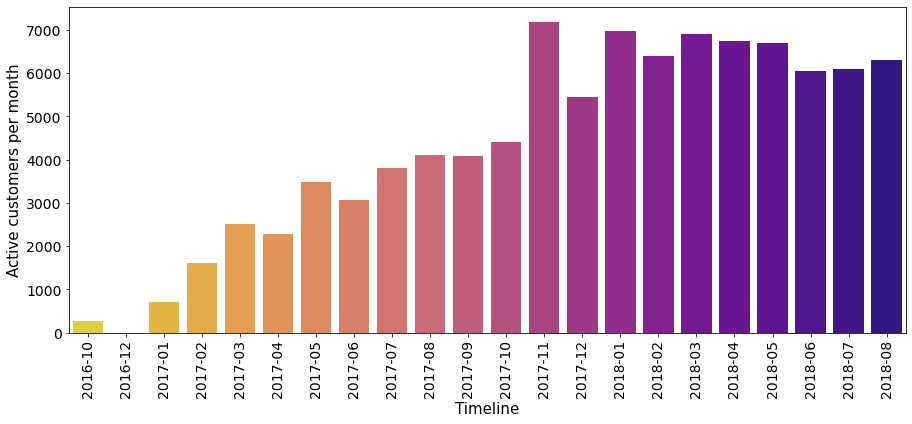

In [16]:
#creating monthly active customers dataframe by counting unique Customer IDs
active_customers = final_df.groupby('year_month')['customer_unique_id'].nunique().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="year_month", y="customer_unique_id", data=active_customers, palette="plasma_r")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("Active customers per month", fontsize=15 )
plt.show()

## Average Revenue per Month

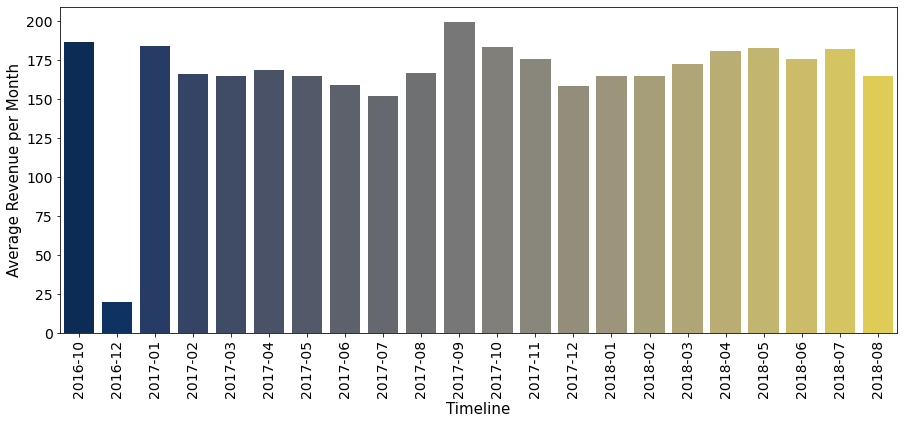

In [17]:
# create a new dataframe for average revenue by taking the mean of it
average_revenue = final_df.groupby('year_month')['payment_value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", y="payment_value", data=average_revenue, palette="cividis")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("Average Revenue per Month", fontsize=15 )
plt.show()

## Total revenue per month

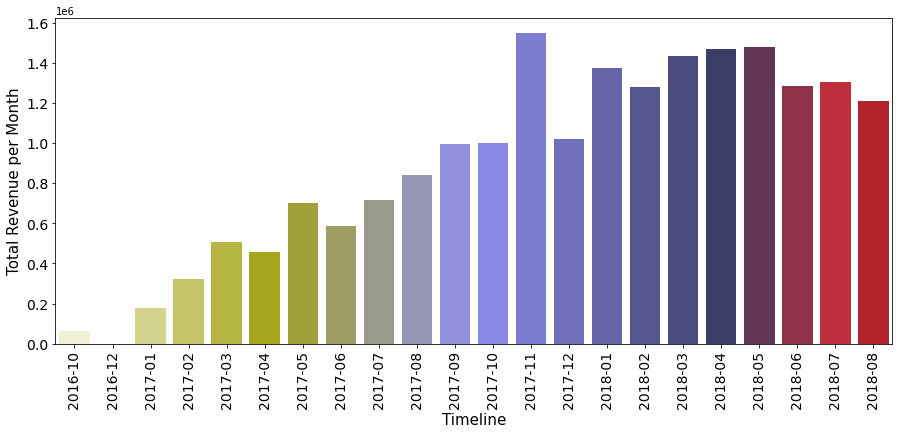

In [18]:
total_revenue = final_df.groupby(['year_month'])['payment_value'].sum().reset_index()
total_revenue.rename(columns={'payment_value': 'total_revenue'}, inplace=True)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", y="total_revenue", data=total_revenue, palette="gist_stern_r")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("Total Revenue per Month", fontsize=15 )
plt.show()

## Revenue growth

In [19]:
total_revenue['revenue_growth_rate'] = total_revenue['total_revenue'].pct_change()
total_revenue.head()

,year_month,total_revenue,revenue_growth_rate
0,2016-10,62591.65,NaN
1,2016-12,19.62,-0.999687
2,2017-01,176376.56,8988.630989
3,2017-02,323815.95,0.835935
4,2017-03,505735.83,0.561800


In [20]:
# There seems some error in value for the 2016-12. Therefore, getting large value for 2017-01
total_revenue = total_revenue[3:]

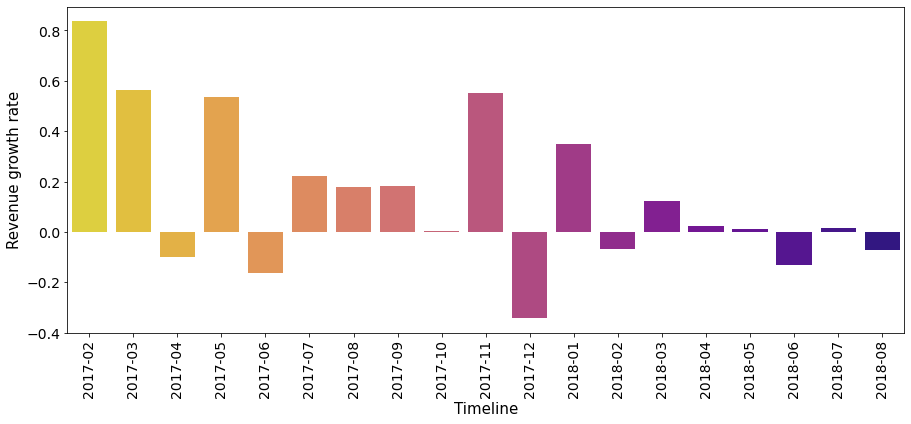

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="year_month", y="revenue_growth_rate", data=total_revenue, palette="plasma_r")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("Revenue growth rate", fontsize=15 )
plt.show()

# Total Order per month

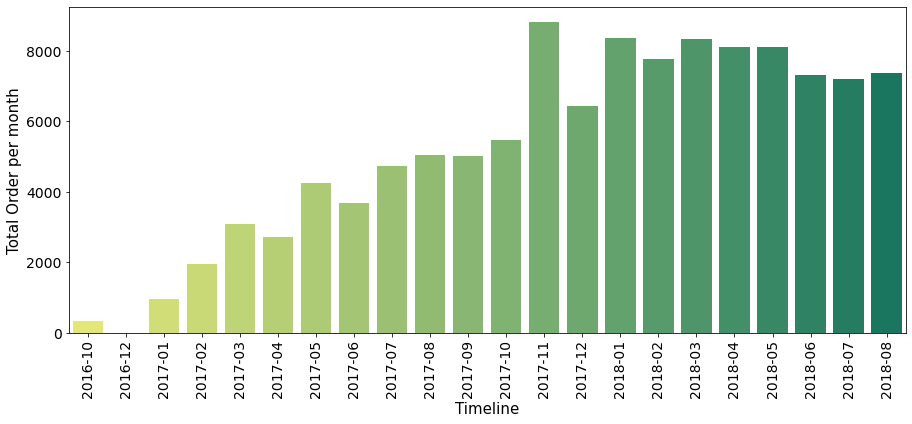

In [22]:
#creating monthly active customers dataframe by counting unique Customer IDs
monthly_sales = final_df.groupby('year_month')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="year_month", y="order_status", data=monthly_sales, palette="summer_r")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("Total Order per month", fontsize=15 )
plt.show()

# New Customer added to the platform

In [23]:
customer_first_purchase = final_df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
customer_first_purchase.columns = ['customer_unique_id', 'customer_first_purchase_date']
customer_first_purchase['customer_first_purchase_date'] = customer_first_purchase.customer_first_purchase_date.apply(lambda x: x.strftime('%Y-%m'))
customer_first_purchase['customer_first_purchase_date'] = pd.to_datetime(customer_first_purchase['customer_first_purchase_date'], format='%Y-%m')
customer_first_purchase = pd.merge(final_df, customer_first_purchase, on='customer_unique_id')
customer_first_purchase['year_month'] = pd.to_datetime(customer_first_purchase['year_month'], format='%Y-%m')
customer_first_purchase['new_existing_customer'] = customer_first_purchase.apply(lambda x: 'New' if x['customer_first_purchase_date'] == x['year_month'] else 'Old',axis=1)

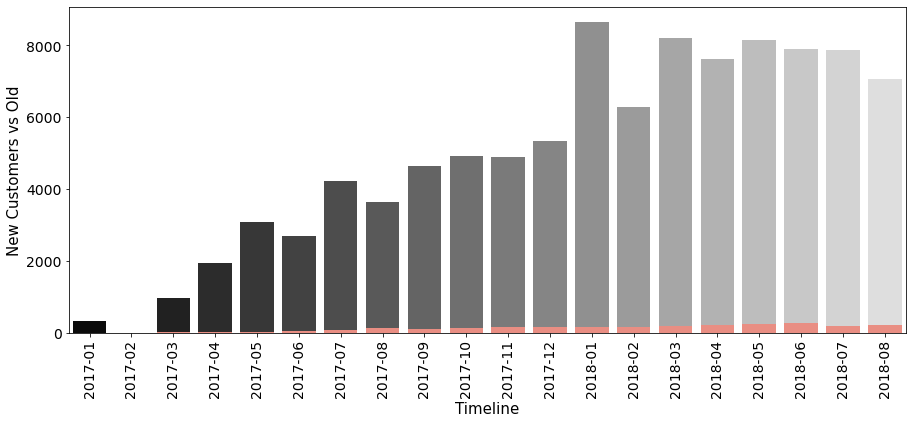

In [24]:
new_customer = customer_first_purchase.groupby(['year_month', 'new_existing_customer'] ).count().reset_index()
new_customer = new_customer.rename(columns={"order_id":"customers"})
new_customer['year_month']  = new_customer['year_month'].apply(lambda x: x.strftime("%Y-%m"))


fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="year_month", y="customers", data=new_customer.query("new_existing_customer == 'New'"), palette="gist_gray")
sns.barplot(x="year_month", y="customers", data=new_customer.query("new_existing_customer == 'Old'"), color="salmon")
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.xlabel("Timeline", fontsize=15 ); plt.ylabel("New Customers vs Old", fontsize=15 )
plt.show()

# RFM Analysis
Recency, Frequency, Monetary Analysis of the customers

In [25]:
# last date of the dataset
last_time_purchase = final_df['order_purchase_timestamp'].max()

In [26]:
                                                 # when was recent time when customer purchased
rfm= final_df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (last_time_purchase - x.max() ).days,
                                                 # what is the frequency of purchase
                                                'order_id': lambda x: len(x),
                                                 # what is the revenue generated by the user
                                                'payment_value': lambda x: x.sum()})

rfm = rfm.rename(columns={"order_purchase_timestamp":"Recency", "order_id": "Frequency", "payment_value": "Monetary"})

In [27]:
rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

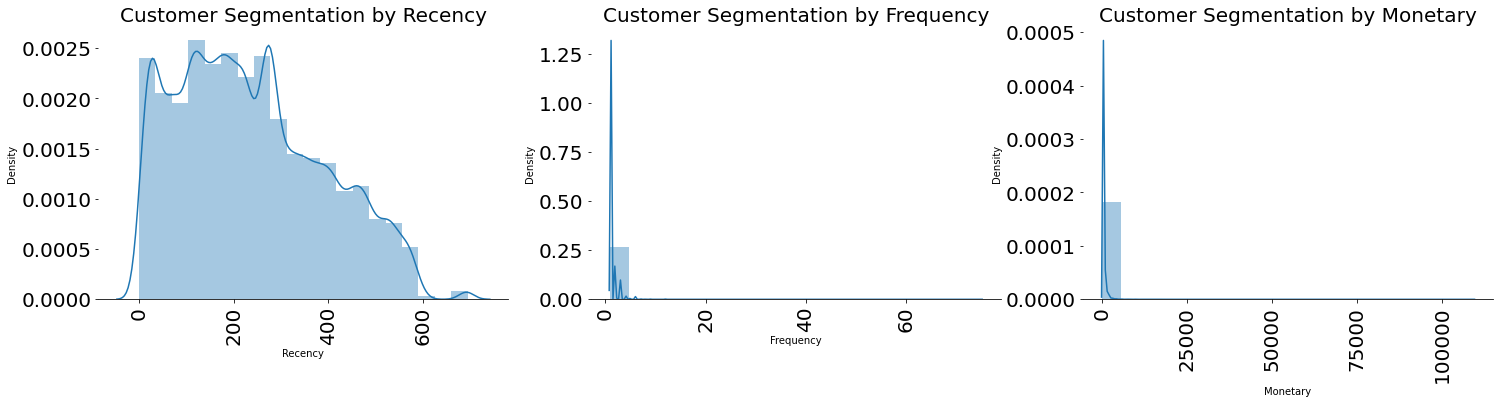

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
sns.despine(left=True)
sns.distplot(rfm['Recency'], bins=20, ax=ax[0])
sns.distplot(rfm['Frequency'], bins=20, ax=ax[1] )
sns.distplot(rfm['Monetary'], bins=20, ax=ax[2])

ax[0].set_title('Customer Segmentation by Recency', fontsize=20)
ax[0].tick_params(axis='x', labelrotation=90, labelsize=20);ax[0].tick_params(axis='y', labelsize=20)

ax[1].set_title('Customer Segmentation by Frequency', fontsize=20)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=20);ax[1].tick_params(axis='y', labelsize=20)

ax[2].set_title('Customer Segmentation by Monetary', fontsize=20)
ax[2].tick_params(axis='x', labelrotation=90, labelsize=20);ax[2].tick_params(axis='y', labelsize=20)

plt.show()

## Clustering of RFM

In [53]:
def clustering(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [54]:
kmeans_recency = KMeans(n_clusters=6)
kmeans_recency.fit(rfm[['Recency']])
rfm['Recency_Cluster'] = kmeans_recency.predict(rfm[['Recency']])
rfm = clustering('Recency_Cluster', 'Recency',rfm,False)


kmeans_frequency = KMeans(n_clusters=5)
kmeans_frequency.fit(rfm[['Frequency']])
rfm['Frequency_Cluster'] = kmeans_frequency.predict(rfm[['Frequency']])
rfm = clustering('Frequency_Cluster', 'Frequency',rfm,True)


kmeans_monetary = KMeans(n_clusters=6)
kmeans_monetary.fit(rfm[['Monetary']])
rfm['Monetary_Cluster'] = kmeans_monetary.predict(rfm[['Monetary']])
rfm = clustering('Monetary_Cluster', 'Monetary',rfm,True)

In [55]:
rfm['Rfm_Score'] = rfm['Recency_Cluster'] + rfm['Frequency_Cluster'] + rfm['Monetary_Cluster']
rfm.groupby('Rfm_Score').mean()

,Recency,Frequency,Monetary,Recency_Cluster,Frequency_Cluster,Monetary_Cluster
Rfm_Score,,,,,,
0,522.384836,1.000000,117.884436,0.000000,0.000000,0.000000
1,414.579293,1.081077,142.060462,0.896952,0.074509,0.028539
2,309.064565,1.126718,161.713226,1.843622,0.108452,0.047926
3,224.459595,1.182859,177.586730,2.787038,0.145447,0.067515
4,145.740009,1.210987,190.951688,3.758091,0.161810,0.080099
5,62.642327,1.226022,199.371490,4.741208,0.169616,0.089176
6,75.015040,2.191040,593.299770,4.604480,0.879360,0.516160
7,73.453222,3.186071,1152.147651,4.624740,1.292100,1.083160
8,78.350694,5.090278,2632.689444,4.552083,1.913194,1.534722


In [56]:
rfm['Segment'] = 'Low'
rfm.loc[rfm['Rfm_Score']>4,'Segment'] = 'Medium' 
rfm.loc[rfm['Rfm_Score']>8,'Segment'] = 'High' 

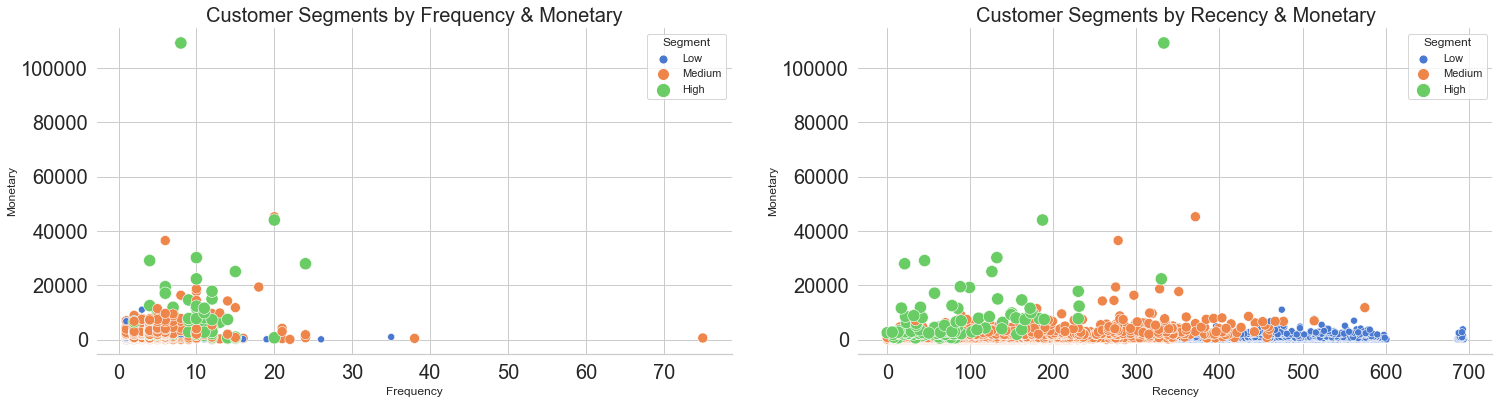

In [57]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.despine(left=True)

sns.scatterplot(x='Frequency', y='Monetary', ax=ax[0], hue='Segment', data=rfm, size='Segment' , sizes=(50,150), size_order=['High','Medium','Low'])
ax[0].tick_params(axis='x', labelsize=20);ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_title('Customer Segments by Frequency & Monetary', fontsize=20)

sns.scatterplot(x='Recency', y='Monetary', ax=ax[1], hue='Segment', data=rfm, size='Segment' , sizes=(50,150), size_order=['High','Medium','Low'])
ax[1].tick_params(axis='x', labelsize=20);ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_title('Customer Segments by Recency & Monetary', fontsize=20)

plt.show()

# Most sold product year wise

In [35]:
product_dataset = pd.read_csv("olist_products_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")

In [36]:
final_df = final_df.merge(product_dataset, on='product_id')
final_df = final_df.merge(product_name, on='product_category_name')

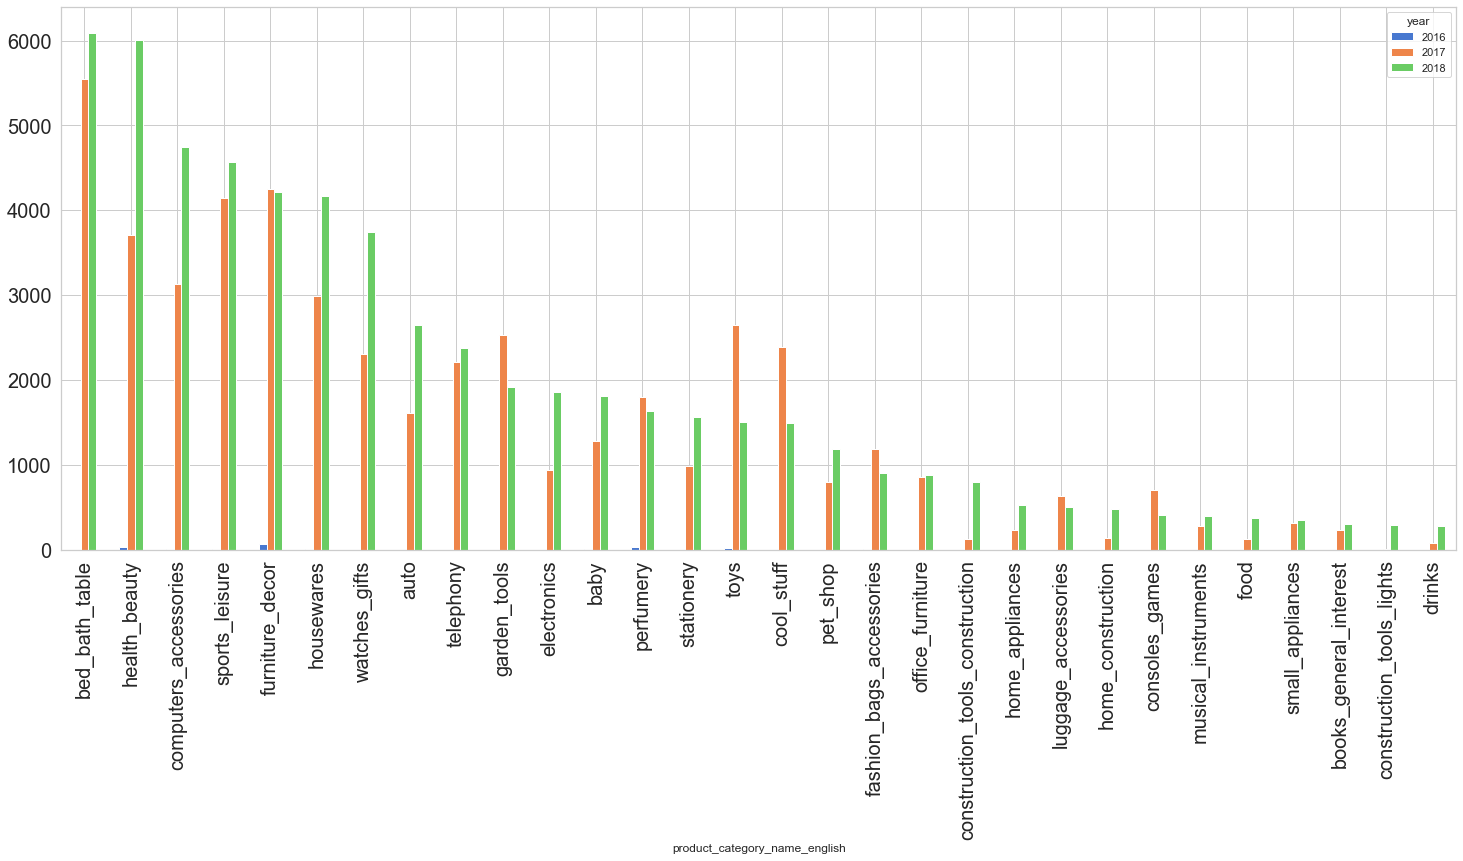

In [38]:
cross = pd.crosstab(final_df['product_category_name_english'], final_df['year'])
cross = cross.sort_values(by=2018, ascending=False)

ax = cross[:30].plot.bar(figsize=(25, 10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Most profitable products

In [40]:
profit= final_df.groupby(['product_category_name', 'year_month'])[['freight_value','payment_value', 'price']].sum().reset_index()
# total value
profit['total_order_value'] = profit['price'] + profit['freight_value']
# profit
profit['gross_profit'] = profit['payment_value']- profit['total_order_value']
profit.sort_values('gross_profit').head()

,product_category_name,year_month,freight_value,payment_value,price,total_order_value,gross_profit
789,instrumentos_musicais,2017-05,770.93,10383.32,21951.70,22722.63,-12339.31
1057,pcs,2017-09,2073.60,54718.87,62178.38,64251.98,-9533.11
12,agro_industria_e_comercio,2018-02,1255.95,10835.68,16449.30,17705.25,-6869.57
521,eletrodomesticos_2,2018-06,2102.78,9175.46,13926.49,16029.27,-6853.81
166,bebes,2018-03,5310.64,47997.75,46999.62,52310.26,-4312.51


In [41]:
profit.sort_values('gross_profit', ascending=False)['product_category_name'].unique()

array(['telefonia_fixa', 'informatica_acessorios', 'moveis_decoracao',
       'automotivo', 'utilidades_domesticas', 'cama_mesa_banho',
       'moveis_escritorio', 'bebidas', 'ferramentas_jardim',
       'agro_industria_e_comercio', 'beleza_saude', 'telefonia',
       'relogios_presentes', 'esporte_lazer',
       'construcao_ferramentas_construcao', 'sinalizacao_e_seguranca',
       'bebes', 'pcs', 'moveis_sala', 'climatizacao',
       'construcao_ferramentas_seguranca', 'brinquedos', 'pet_shop',
       'eletroportateis', 'fashion_bolsas_e_acessorios', 'eletronicos',
       'cool_stuff', 'construcao_ferramentas_iluminacao',
       'artigos_de_natal', 'instrumentos_musicais', 'casa_construcao',
       'consoles_games', 'perfumaria', 'casa_conforto', 'moveis_quarto',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'market_place',
       'papelaria', 'construcao_ferramentas_ferramentas',
       'livros_interesse_geral', 'alimentos_bebidas', 'malas_acessorios',
       'industria_c

In [43]:
top_10_gross_profit = profit.sort_values('gross_profit', ascending=False)['product_category_name'].unique()[0:10]

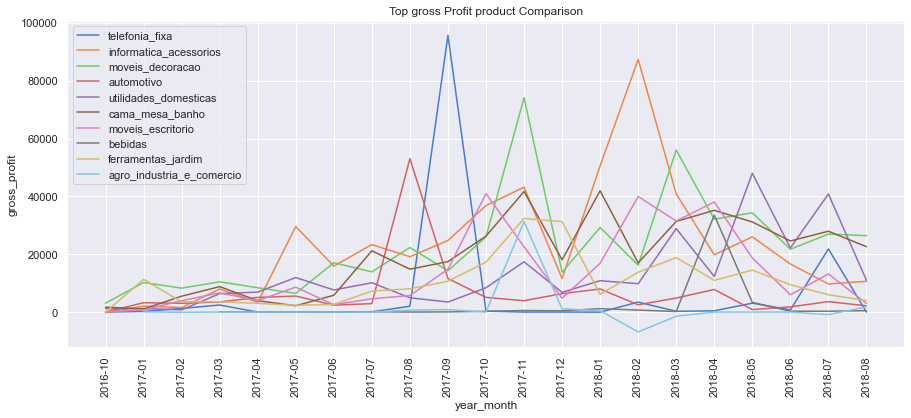

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set(palette='muted', color_codes=True)
for i in range(len(top_10_gross_profit)):
    product = top_10_gross_profit[i]
    plot_df = profit[profit.product_category_name == product][['year_month', 'gross_profit']]
    ax = sns.lineplot(x='year_month', y='gross_profit', data=plot_df, label=product)
ax.set_title('Top gross Profit product Comparison')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

# Market Basket Analysis

### Support
It measures the frequeny of an item occuring in when the customer is purchasing
###### Support{X} = Frequency{X} / Number_of_transaction
###### Support{X,Y} = Frequency{X intersection Y} / Number_of_transaction

### Confidence.
This means when an item X is purchased, how likely item Y is purchased
###### Confidence{X->Y} = Support{X,Y} / Support{X}

#### Drawback of confidence: 
Confidence measure says how popular X is but does not say anything about Y. 

### Lift.
This means the likelihood of item Y is purchased when item X is purchased, while measuring for how popular item Y is. A lift > 1 means that item Y is likely to be bought if item X is bought, while lift < 1 means indicates item Y is unlikely to be bought if item X is bought. 
###### Confidence{X->Y} = Support{X,Y} / (Support{X} * Support{Y})

In [46]:
product_name = final_df.groupby("order_id").product_category_name_english.unique()
product_name.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75          [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

In [47]:
t_encoder = TransactionEncoder()
t_encoder.fit(product_name)
onehot = t_encoder.transform(product_name)
onehot = pd.DataFrame(onehot, columns = t_encoder.columns_)

In [48]:
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Apriori algorithm 
frequent_items = apriori(onehot, min_support = 0.0001, use_colnames = True)
frequent_items

,support,itemsets
0,0.001861,(agro_industry_and_commerce)
1,0.002586,(air_conditioning)
2,0.002050,(art)
3,0.000242,(arts_and_craftmanship)
4,0.003659,(audio)
...,...,...
81,0.000252,"(furniture_decor, housewares)"
82,0.000116,"(garden_tools, housewares)"
83,0.000126,"(health_beauty, perfumery)"
84,0.000147,"(health_beauty, sports_leisure)"


In [50]:
# Using support matrix
rules = association_rules(frequent_items, metric = 'support', min_threshold = 0.0001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bed_bath_table),(baby),0.097477,0.029534,0.000179,0.001834,0.062086,-0.002700,0.972249
1,(baby),(bed_bath_table),0.029534,0.097477,0.000179,0.006052,0.062086,-0.002700,0.908019
2,(baby),(cool_stuff),0.029534,0.037388,0.000210,0.007120,0.190433,-0.000894,0.969515
3,(cool_stuff),(baby),0.037388,0.029534,0.000210,0.005624,0.190433,-0.000894,0.975955
4,(furniture_decor),(baby),0.066271,0.029534,0.000126,0.001904,0.064463,-0.001831,0.972317


In [51]:
# Using confidence matrix
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(furniture_decor),(bed_bath_table),0.066271,0.097477,0.000736,0.011106,0.113933,-0.005724,0.912659
1,(home_confort),(bed_bath_table),0.004122,0.097477,0.000452,0.109694,1.125335,0.000050,1.013723
2,(construction_tools_lights),(furniture_decor),0.002544,0.066271,0.000116,0.045455,0.685893,-0.000053,0.978193
3,(home_construction),(furniture_decor),0.005078,0.066271,0.000137,0.026915,0.406139,-0.000200,0.959556


In [52]:
# Using lift
rules = association_rules(frequent_items, metric="lift", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bed_bath_table),(baby),0.097477,0.029534,0.000179,0.001834,0.062086,-0.002700,0.972249
1,(baby),(bed_bath_table),0.029534,0.097477,0.000179,0.006052,0.062086,-0.002700,0.908019
2,(baby),(cool_stuff),0.029534,0.037388,0.000210,0.007120,0.190433,-0.000894,0.969515
3,(cool_stuff),(baby),0.037388,0.029534,0.000210,0.005624,0.190433,-0.000894,0.975955
4,(furniture_decor),(baby),0.066271,0.029534,0.000126,0.001904,0.064463,-0.001831,0.972317
